In [27]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import time
from sklearn import metrics

In [19]:
df = pd.read_excel('/content/UV_METER_DATA.xlsx').iloc[:,0:6]
print(df.head())

  Welding Type        Industry  Temperature  Distance Covered   Average
0         SMAW   Electro Power         28.8        12      No  1066.285
1         SMAW   Electro Power         28.8        12     Yes    18.333
2         SMAW  Prakash Deisel         19.3        12      No  1014.800
3         SMAW  Prakash Deisel         19.2        12     Yes  1033.250
4          MIG  Prakash Deisel         20.0        12      No   191.200


In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([('encoder', OneHotEncoder(), ['Welding Type','Industry','Covered'])], remainder='passthrough')
transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df

,encoder__Welding Type_MIG,encoder__Welding Type_SMAW,encoder__Industry_Electro Power,encoder__Industry_Garg Overseas,encoder__Industry_Prakash Deisel,encoder__Covered_No,encoder__Covered_Yes,remainder__Temperature,remainder__Distance,remainder__Average
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,28.8,12.0,1066.285
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,28.8,12.0,18.333
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,19.3,12.0,1014.800
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,19.2,12.0,1033.250
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,20.0,12.0,191.200
...,...,...,...,...,...,...,...,...,...,...
76,0.0,1.0,0.0,1.0,0.0,0.0,1.0,23.0,36.0,1.750
77,0.0,1.0,1.0,0.0,0.0,1.0,0.0,26.6,38.0,8.666
78,0.0,1.0,1.0,0.0,0.0,0.0,1.0,26.6,38.0,1.000
79,0.0,1.0,0.0,1.0,0.0,1.0,0.0,23.5,38.0,6.714


In [29]:
np.random.seed(1)
train,test = np.split(transformed_df,[int(.8*len(transformed_df))])
X = transformed_df.iloc[:,0:9]
Y = transformed_df.iloc[:,9:10]
x_train = train.iloc[:,0:9]
x_test = test.iloc[:,0:9]
Trans_x_train = x_train.iloc[:,0:9]
Trans_x_test = x_test.iloc[:,0:9]
y_train = train.iloc[:,9:10].to_numpy()
y_test = test.iloc[:,9:10].to_numpy()
Trans_x_train
y_test

array([[  2.   ],
       [ 15.   ],
       [  0.   ],
       [ 41.666],
       [  1.5  ],
       [154.   ],
       [  1.   ],
       [ 10.666],
       [  1.   ],
       [200.   ],
       [  1.5  ],
       [ 57.   ],
       [  1.75 ],
       [  8.666],
       [  1.   ],
       [  6.714],
       [  1.2  ]])

Training Time = 0.003737211227416992 seconds
Prediction Time = 338.7928009033203 microseconds
Root mean squared error = 390.75837184348495


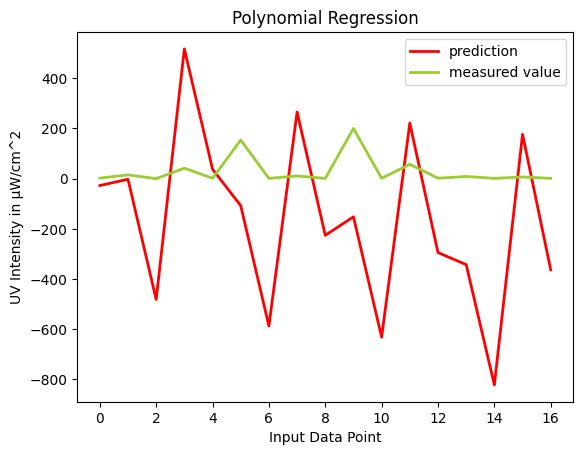

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.figure()

poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(Trans_x_train)
poly_features_test = poly.transform(Trans_x_test)
start_time = time.time()
poly_reg = LinearRegression()

start_time = time.time()
poly_reg.fit(poly_features,y_train)
end_time = time.time()
print("Training Time = "+str(end_time - start_time)+" seconds")

start_time = time.time()
prediction = poly_reg.predict(poly_features_test)
end_time = time.time()
print("Prediction Time = "+str((end_time - start_time)*1000000)+" microseconds")

errors = mean_squared_error(y_test, prediction, squared=False)
print("Root mean squared error = "+ str(errors))


###Plot actual vs prediction Value
value = [i for i in range(0, len(y_test))]
plt.plot(value, prediction, color="red", label="prediction", linewidth=2)
plt.plot(value, y_test, color="yellowgreen", label="measured value", linewidth=2)
plt.xlabel("Input Data Point")
plt.ylabel("UV Intensity in µW/cm^2")
plt.title("Polynomial Regression")
plt.legend()
plt.savefig("Polynomial Regression.png",dpi=500)
plt.show()

Training Time = 0.14509963989257812 seconds
Prediction Time = 1179.6951293945312 microseconds
76.20885841669897


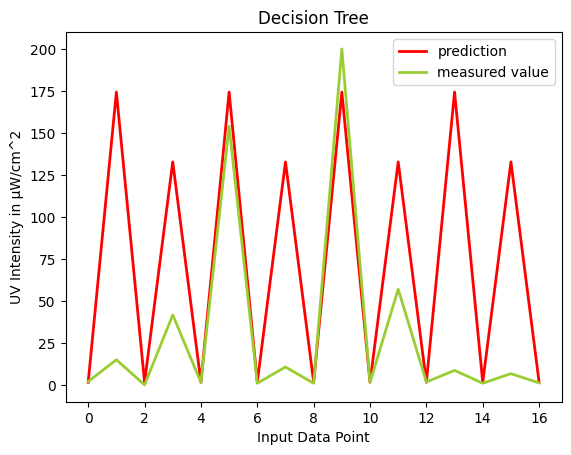

Time Elapsed = 0.9316704273223877 seconds


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.figure()

start_time = time.time()
model_temp = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 6, 10, 14, 20,30,None]}

dt_reg = GridSearchCV(model_temp,param_grid,cv=5)

start_time = time.time()
dt_reg.fit(Trans_x_train,y_train)
end_time = time.time()
print("Training Time = "+str(end_time - start_time)+" seconds")

start_time = time.time()
prediction = dt_reg.predict(Trans_x_test)
end_time = time.time()
print("Prediction Time = "+str((end_time - start_time)*1000000)+" microseconds")

errors = mean_squared_error(y_test, prediction, squared=False)
print(errors)

###Plot actual vs prediction Value
value = [i for i in range(0, len(y_test))]
plt.plot(value, prediction, color="red", label="prediction", linewidth=2)
plt.plot(value, y_test, color="yellowgreen", label="measured value", linewidth=2)
plt.xlabel("Input Data Point")
plt.ylabel("UV Intensity in µW/cm^2")
plt.title("Decision Tree")
plt.legend()
plt.savefig("Decision Tree.png",dpi=500)
plt.show()
end_time = time.time()
print("Time Elapsed = "+str(end_time - start_time)+" seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training Time = 0.8193933963775635 seconds
Prediction Time = 1337.5282287597656 microseconds
86.0493862929257


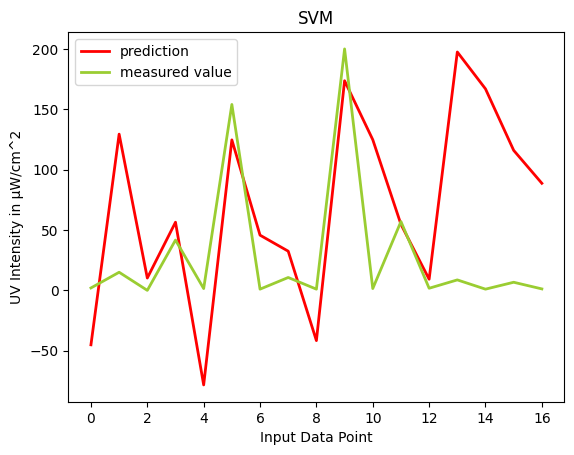

In [32]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.figure()
model_temp = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 10000],
              'gamma': [10000,10,1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

svc_reg = GridSearchCV(model_temp,param_grid,cv=5)

start_time = time.time()
svc_reg.fit(Trans_x_train,y_train)
end_time = time.time()
print("Training Time = "+str(end_time - start_time)+" seconds")


start_time = time.time()
prediction = svc_reg.predict(Trans_x_test)
end_time = time.time()
print("Prediction Time = "+str((end_time - start_time)*1000000)+" microseconds")

errors = mean_squared_error(y_test, prediction, squared=False)
print(errors)

###Plot actual vs prediction Value
value = [i for i in range(0, len(y_test))]
plt.plot(value, prediction, color="red", label="prediction", linewidth=2)
plt.plot(value, y_test, color="yellowgreen", label="measured value", linewidth=2)
plt.xlabel("Input Data Point")
plt.ylabel("UV Intensity in µW/cm^2")
plt.title("SVM")
plt.legend()

plt.savefig("SVC.png",dpi=500)
plt.show()

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.figure()


model_temp = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 150,200,250],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rf_reg = GridSearchCV(model_temp,param_grid,cv=5)

start_time = time.time()
rf_reg.fit(Trans_x_train,y_train)
end_time = time.time()
print("Training Time = "+str(end_time - start_time)+" seconds")

start_time = time.time()
prediction = rf_reg.predict(Trans_x_test)
end_time = time.time()
print("Prediction Time = "+str((end_time - start_time)*1000000)+" microseconds")

errors = mean_squared_error(y_test, prediction, squared=False)
print(errors)

###Plot actual vs prediction Value
value = [i for i in range(0, len(y_test))]
plt.plot(value, prediction, color="red", label="prediction", linewidth=2)
plt.plot(value, y_test, color="yellowgreen", label="measured value", linewidth=2)
plt.xlabel("Input Data Point")
plt.ylabel("UV Intensity in µW/cm^2")
plt.title("Random Forest")
plt.legend()

plt.savefig('Random Forest.png',dpi=500)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

KeyboardInterrupt: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.figure()

model_temp = MLPRegressor()
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [500, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mpl_reg = GridSearchCV(model_temp,param_grid,scoring='neg_root_mean_squared_error',cv=5)

start_time = time.time()
mpl_reg.fit(Trans_x_train,y_train)
end_time = time.time()
print("Training Time = "+str(end_time - start_time)+" seconds")

start_time = time.time()
prediction = mpl_reg.predict(Trans_x_test)
end_time = time.time()
print("Prediction Time = "+str((end_time - start_time)*1000000)+" microseconds")

errors = mean_squared_error(y_test, prediction, squared=False)
print(errors)

###Plot actual vs prediction Value
value = [i for i in range(0, len(y_test))]
plt.plot(value, prediction, color="red", label="prediction", linewidth=2)
plt.plot(value, y_test, color="yellowgreen", label="measured value", linewidth=2)
plt.xlabel("Input Data Point")
plt.ylabel("UV Intensity in µW/cm^2")
plt.title("MLP")
plt.legend()

plt.savefig("MLP.png",dpi=500)
plt.show()

In [ ]:
print("K fold cross validation scores for k = 5 are as follows :")

print("Polynomial Regression:")
scores = cross_val_score(poly_reg, X, Y, cv=5,scoring = 'neg_root_mean_squared_error')
print("Scores:",scores,end = "\n")
print("Mean:",scores.mean(),end = "\n\n")

print("Decision Tree Regression:")
scores = cross_val_score(dt_reg, X, Y, cv=5,scoring = 'neg_root_mean_squared_error')
print("Scores:",scores,end = "\n")
print("Mean:",scores.mean(),end = "\n\n")

print("Support Vector Machine Regression:")
scores = cross_val_score(svc_reg, X, Y, cv=5,scoring = 'neg_root_mean_squared_error')
print("Scores:",scores,end = "\n")
print("Mean:",scores.mean(),end = "\n\n")


print("Random Forest Regression:")
scores = cross_val_score(rf_reg, X, Y, cv=5,scoring = 'neg_root_mean_squared_error')
print("Scores:",scores,end = "\n")
print("Mean:",scores.mean(),end = "\n\n")

print("Multilayer Perceptron Regression:")
scores = cross_val_score(mpl_reg, X, Y, cv=5,scoring = 'neg_root_mean_squared_error')
print("Scores:",scores,end = "\n")
print("Mean:",scores.mean(),end = "\n\n")

K fold cross validation scores for k = 5 are as follows :
Polynomial Regression:
Scores: [-655.46718867 -299.02840352 -191.54941562 -233.62448033 -401.32485154]
Mean: -356.1988679351931

Decision Tree Regression:
Scores: [-626.20425901 -404.7227992  -166.26899485 -202.41697195  -78.5545628 ]
Mean: -295.6335175629006

Support Vector Machine Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Scores: [-812.69981984 -319.35297758 -266.67272938 -213.51103183 -172.42068651]
Mean: -356.9314490287343

Random Forest Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

KeyboardInterrupt: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr

[14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]
[14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]
[14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]
[14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr

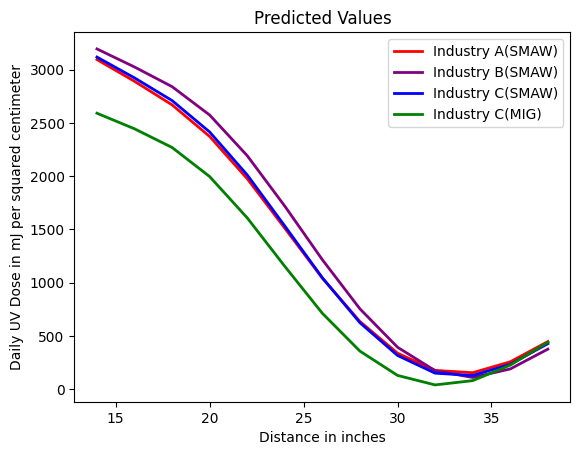

In [35]:
Temperature = 25.0
Covered = "No"
data = [["SMAW","Electro Power",Temperature,0,Covered,0],["SMAW","Garg Overseas",Temperature,0,Covered,0],["SMAW","Prakash Deisel",Temperature,0,Covered,0],["MIG","Prakash Deisel",Temperature,0,Covered,0]]
sim_data1=pd.DataFrame(data,columns=['Welding Type','Industry','Temperature','Distance','Covered','Average'])

sim_data1 = transformer.transform(sim_data1)

sim_data1_x = []
for x in sim_data1:
  sim_data1_x.append(x[0:9])

colors =["red","purple","blue",'green']
sim_data1_x = pd.DataFrame(sim_data1_x,columns = list(set(transformer.get_feature_names_out())-set(["remainder__Average"])))
result=[[],[],[],[]]
plt.figure()
Industries = ["Industry A(SMAW)","Industry B(SMAW)", "Industry C(SMAW)","Industry C(MIG)"]
for i,row in sim_data1_x.iterrows():
  result[i] = []
  distanceList = []
  for distance in range(14,40,2):
    row['remainder__Distance']=distance
    pred = svc_reg.predict([row])[0]
    distanceList.append(distance)
    time = 0.1 * 60 *60 *8/1000
    result[i].append(pred*time)
  plt.plot(distanceList,result[i], color=colors[i], label=Industries[i], linewidth=2)
  print(distanceList)
plt.xlabel("Distance in inches")
plt.ylabel("Daily UV Dose in mJ per squared centimeter")
plt.title("Predicted Values")
plt.legend()
plt.savefig("UV pred.png")
plt.show()